# Graph traversal

Backtracking is a systematic way of enemerating or going through all possible candidate solutions to find those that satisfy certain requirements.

Here's an example in AI. When two people play a game of chess (go/whater 2-person game), typically in each step (when it's your turn to make a move), you go through all possible candidate moves and find one that is best.

The backtracking template we've developed does not intelligently go through the possibilities.

This makes backtracking slow.  In assignment 6, you'll learn some tricks/heuristics to make the backtracking template more efficient.

To improve the efficiency of backtracking further, to make the systematic generation of possibilites a little smarter, we'll abandon the "recursive approach" and come back to an iterative.

In [1]:
import networkx as nx
import random

#
# when seed is None, the graph is randomly generated and colored.
#
def randomly_colored_graph(n, pair_prob=0.5, color_prob=0.25, seed=2022):
    random.seed(seed)
    G = nx.Graph()
    for i in range(n):
        if random.random() < color_prob:
            G.add_node(i, color='red')
        else:
            G.add_node(i, color='white')
    for i in range(n):
        for j in range(i+1,n):
            if random.random() < pair_prob:
                G.add_edge(i,j)
    return G


def draw_colored_graph(G):
    nx.draw(
        G, 
        with_labels=True, 
        node_color=[ G.nodes[i]['color'] for i in G.nodes ],
    )

### Recursive traversal in a network

Let's come up with a strategy to visit every node in a network.

The API:
```
def explore(G, v) -- visit all nodes starting from a node v
```

Nodes' methods and attributes:
+ g.nodes[v]
+ g.neighbors[v]

Strategy:
+ Mark v, so we know it's been "visited".
+ Look at neighbors of v, we mark them as "visited", and then visit their neighbors, and then visit their neighbors' neighbors, and then ....

+ Look at neighbors of v, use the same procedure to visit all nodes starting from these neighbors.



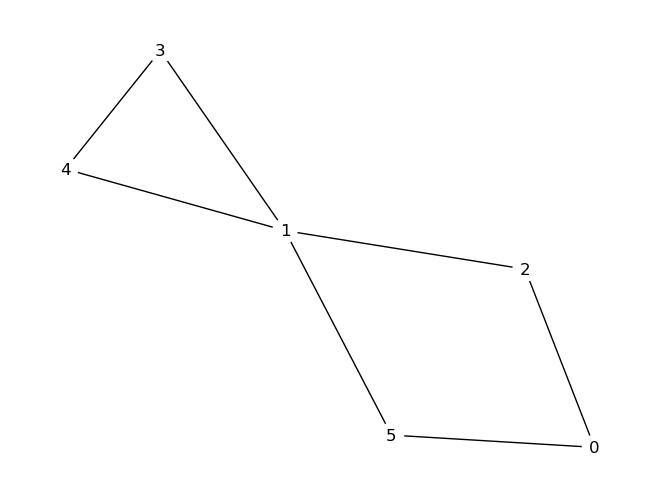

In [2]:
my_network = randomly_colored_graph(6, pair_prob=0.3, color_prob=0, seed=28)
draw_colored_graph(my_network)

Visiting 0 at time 1
Visiting 2 at time 2
Visiting 1 at time 3
Visiting 3 at time 4
Visiting 4 at time 5
Visiting 5 at time 6
callviz: Rendering in inline in Jupyter Notebook


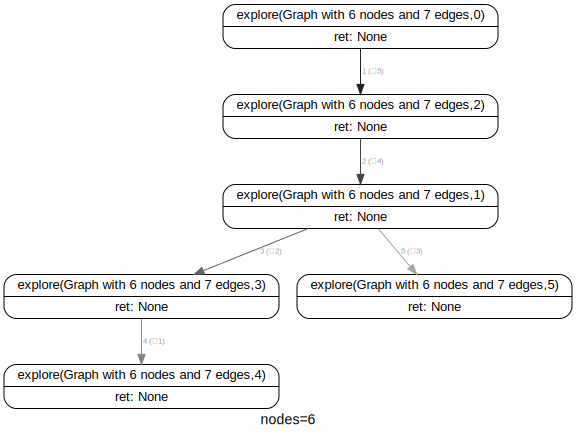

In [7]:
from rcviz import viz

#
# explore/visit all nodes starting from node v.
#

timer = 0
my_network = randomly_colored_graph(6, pair_prob=0.3, color_prob=0, seed=28)

@viz()
def explore(G, v):
    global timer
    timer += 1
    print('Visiting', v, 'at time', timer)
    G.nodes[v]['visited'] = 1
    for u in G.neighbors(v):
        if 'visited' not in G.nodes[u]:
            explore(G, u)

explore(my_network, 0)
viz.render()

In [5]:
timer = 0 
my_network = randomly_colored_graph(6, pair_prob=0.3, color_prob=0, seed=28)
explore(my_network, 0)

Visiting 0 at time 1
Visiting 2 at time 2
Visiting 1 at time 3
Visiting 3 at time 4
Visiting 4 at time 5
Visiting 5 at time 6


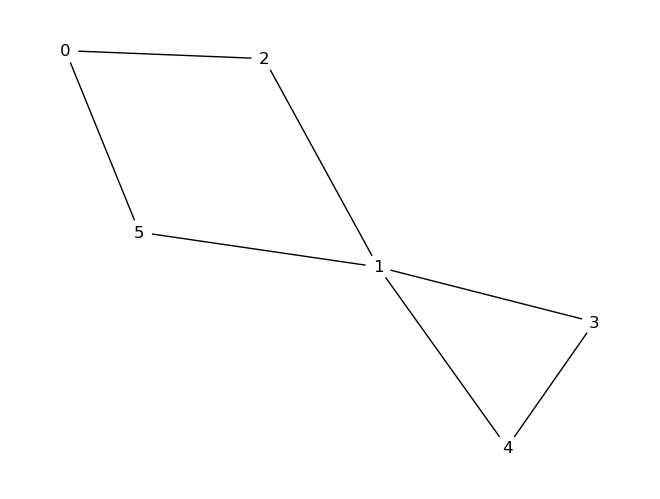

In [5]:
draw_colored_graph(my_network)

Let's say we want to sell cookies to people on FaceBook (starting from our own page).

We have a starting node.  We have a network.

Can we this algorithm the following application?  Yes.

But this algorithm has some characteristics that might not serve this application best.

### Traversing a tree

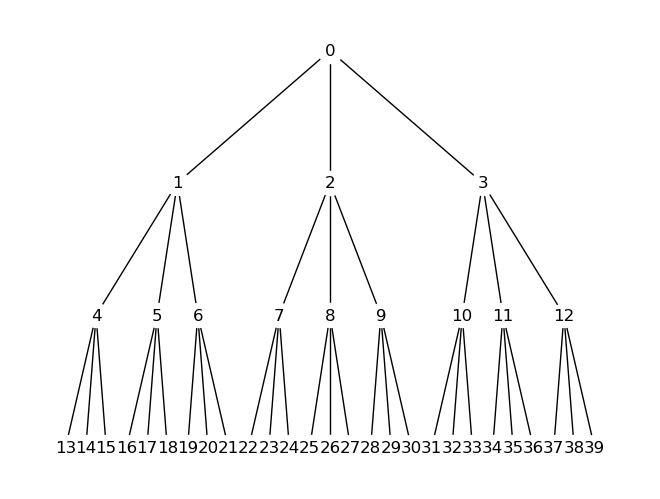

In [8]:
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(3, 3)
pos = graphviz_layout(T, prog="dot")
pos = { int(k) : v for k,v in pos.items()}
nx.draw(T, pos=pos, with_labels=True, node_color='white')

In [9]:
timer = 0 
explore(T, 0)

Visiting 0 at time 1
Visiting 1 at time 2
Visiting 4 at time 3
Visiting 13 at time 4
Visiting 14 at time 5
Visiting 15 at time 6
Visiting 5 at time 7
Visiting 16 at time 8
Visiting 17 at time 9
Visiting 18 at time 10
Visiting 6 at time 11
Visiting 19 at time 12
Visiting 20 at time 13
Visiting 21 at time 14
Visiting 2 at time 15
Visiting 7 at time 16
Visiting 22 at time 17
Visiting 23 at time 18
Visiting 24 at time 19
Visiting 8 at time 20
Visiting 25 at time 21
Visiting 26 at time 22
Visiting 27 at time 23
Visiting 9 at time 24
Visiting 28 at time 25
Visiting 29 at time 26
Visiting 30 at time 27
Visiting 3 at time 28
Visiting 10 at time 29
Visiting 31 at time 30
Visiting 32 at time 31
Visiting 33 at time 32
Visiting 11 at time 33
Visiting 34 at time 34
Visiting 35 at time 35
Visiting 36 at time 36
Visiting 12 at time 37
Visiting 37 at time 38
Visiting 38 at time 39
Visiting 39 at time 40


The order of traversal does not serve this application very well.

The depth-first order of traversal is dictated by the recursive nature of the algorithm.

```
timer = 0
def explore(G, v):
    global timer
    timer += 1
    print('Visiting', v, 'at time', timer)
    G.nodes[v]['visited'] = 1
    for u in G.neighbors(v):
        if 'visited' not in G.nodes[u]:
            explore(G, u)
```

#### Orders of traversing a network

1. Depth-first -- we start from a node v, and go deep into the network.  It can take a while to get to all immediate neighbors of v.  This is the natural order of recursive traversal.


In [1]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node):  #function for dfs 
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

# Driver Code
print("Following is the Depth-First Search")
dfs(visited, graph, '5')

Following is the Depth-First Search
5
3
2
4
8
7


2. Breadth-first -- we start from a node v, and visit immediate neighbors of v, and then visit neighbors of neighbors of v, and so on.  We go wide into the network.

In [2]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = [] # List for visited nodes.
queue = []     #Initialize a queue

def bfs(visited, graph, node): #function for BFS
    visited.append(node)
    queue.append(node)

    while queue:          # Creating loop to visit each node
        m = queue.pop(0) 
        print (m) 

        for neighbour in graph[m]:
            if neighbour not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
print("Following is the Breadth-First Search")
bfs(visited, graph, '5')    # function calling
 

Following is the Breadth-First Search
5
3
7
2
4
8


3. Priority-first -- we start from a node v, and we visit nodes that are most prioritized, regardless of whether they are immediate neighbors or not.

#### Iterative traversal

We'll learn another "template" that allows us to traverse networks **iteratively** in these 3 orders.

This is no longer recursive.

Traversing in or exploring a network has many many applications.

Searching has many applications.

In a network, things are connected.  Searching within these connected things has many many applications.

In [31]:
def iterative_explore(network, v):
    to_be_visited = [v]
    
    while to_be_visited != []:
        # remove some item, u, from the list
        # u = to_be_visited.pop(-1)    # prioritized recently met friends (Depth-first order)
        u = to_be_visited.pop(0)    # prioritized old friends (Breadth-first order)
        
        
        print('visiting', u)
        network.nodes[u]['visited'] = True
        
        # for each neighbor of u that is not yet visited, insert it into the end list.
        for w in network.neighbors(u):
            if 'visited' not in network.nodes[w] and w not in to_be_visited:
                to_be_visited.append(w)

    # after the loop is done, we will have visited all nodes connected to v.

visiting 0
visiting 2
visiting 5
visiting 1
visiting 3
visiting 4


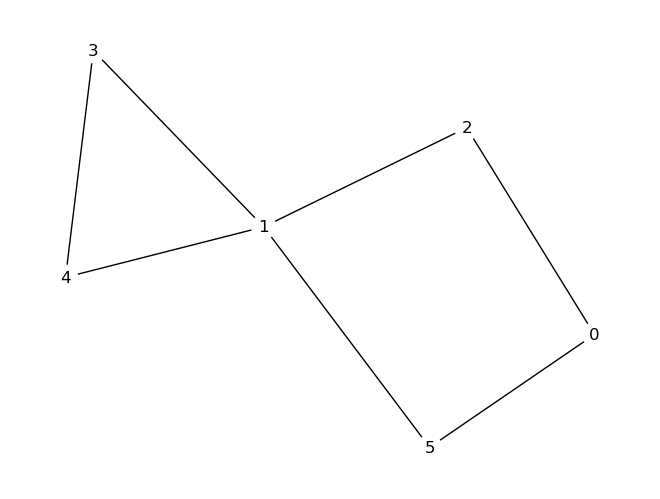

In [32]:
my_network = randomly_colored_graph(6, pair_prob=0.3, color_prob=0, seed=28)
draw_colored_graph(my_network)
iterative_explore(my_network, 0)

In [33]:
T = nx.balanced_tree(3, 3)
iterative_explore(T, 0)

visiting 0
visiting 1
visiting 2
visiting 3
visiting 4
visiting 5
visiting 6
visiting 7
visiting 8
visiting 9
visiting 10
visiting 11
visiting 12
visiting 13
visiting 14
visiting 15
visiting 16
visiting 17
visiting 18
visiting 19
visiting 20
visiting 21
visiting 22
visiting 23
visiting 24
visiting 25
visiting 26
visiting 27
visiting 28
visiting 29
visiting 30
visiting 31
visiting 32
visiting 33
visiting 34
visiting 35
visiting 36
visiting 37
visiting 38
visiting 39


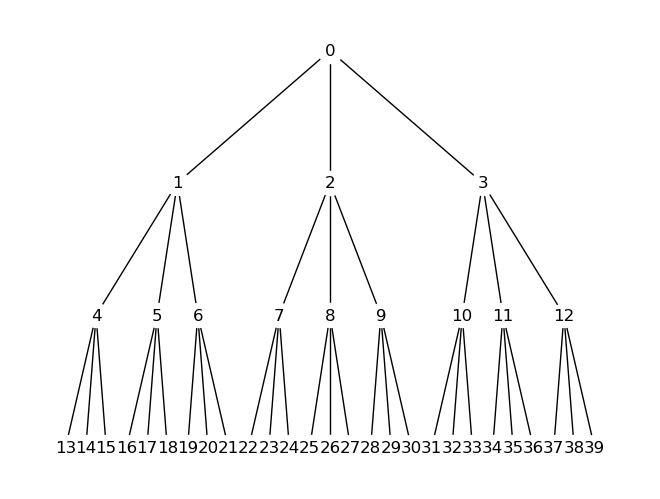

In [30]:
nx.draw(T, pos=pos, with_labels=True, node_color='white')

In [3]:
import networkx as nx

def DepthFirst(network):
    visited_nodes = [0]
    while len(visited_nodes) > 0:
        v = visited_nodes.pop(-1)
        network.nodes[v]['visited'] = True
        print('visiting', v, 'and marking it')
        for u in network[v]:
            if ('visited' not in network.nodes[u]) and (u not in visited_nodes):
                print('\tadding', u, 'to the list.')
                visited_nodes.append(u)    
                
G = nx.gnp_random_graph(n=8, p=0.5, seed=2021)
# DepthFirst(G)


#### Summary

Here's the template for iteratively traversing a network:

```
def iterative_explore(network, v):
    to_be_visited = [v]
    
    while to_be_visited != []:
        u = some_node_to_be_visited_next( to_be_visited )
        
        print('visiting', u)
        network.nodes[u]['visited'] = True
        
        for w in network.neighbors(u):
            if 'visited' not in network.nodes[w] and w not in to_be_visited:
                to_be_visited.append(w)

```

Which node we visit next determines the order of traversal:

+ Depth-first :  u = to_be_visited.pop(-1)
    - remove the last item in the list.
    - when we prioritize nodes that are most recently inserted, the traversal goes deep.
    
+ Breadth-first: u = to_be_visited.pop(0)
    - remove the first item in the list.
    - when we prioritize nodes that were first inserted, the traversal goes "wide".
    
+ Priority-first:  to be discussed.  We can't accomplish with a normal list.  We need a priority queue to accomplish this task.

A priority queue has 3 methods:

+ put -- insert an item with a given priority to the queue.

+ get -- remove the item with the highest priority.  For "min" queue, smaller numbers have higher priorities.  For "max" queue, higher numbers have higher priorities.

+ adjust -- change the priority of an existing item in the queue.

Next time, we'll see how to use this template :

+ to find the closest person in a network.

+ to find shortest paths between two cities.